# Part I - (FordGo Bike Trip Data Exploration)
## by (Bello Victor)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It has 183412 rows and 16 columns. Among the variables recorded are: start time, end time, station name, station latitude and longitude.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head(6)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Transform the start_time and end_time columns to datetime format

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [6]:
# create copy of original data
df_copy = df.copy()

In [7]:
# Drop missing values from dataframe
df_copy.dropna(inplace=True)

In [8]:
df_copy.shape

(174952, 16)

In [9]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [10]:
# transform member_birth_year to int
df_copy.member_birth_year = df.member_birth_year.astype("Int64")

In [11]:
df_copy.member_birth_year.dtype

Int64Dtype()

In [12]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


### Structure of dataset

> Data set has 174952 rows and 16 columns after wrangling. Columns are variables and contain individual data of each trip taken. 

### The main feature(s) of interest in dataset

> The main features of the data set would be the duration_sec(time of trip), the type of user(whether customr or subscriber), the birth year of user,gender of user and some others.

### Features in the dataset I think will help support my investigation into my feature(s) of interest

> The features that will support my investigation could include: duration_sec, user_type, member_birth_year, member_gender and so on.

## Univariate Exploration

> In this section, investigation of distributions of individual variables. 


### Question: What is the frequency of different user types in data set (user_type)

In [13]:
len(df_copy.user_type.unique())

2

<AxesSubplot:xlabel='user_type', ylabel='count'>

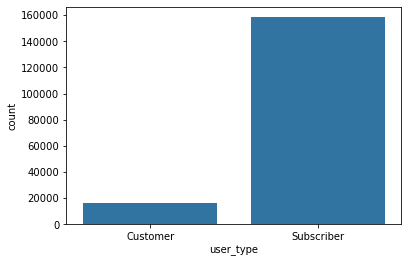

In [14]:
# Using a bar chart
color = sb.color_palette()[0]
sb.countplot(data=df_copy, x="user_type", color=color)

In [15]:
# Pie chart of data
data = df_copy.user_type.value_counts()

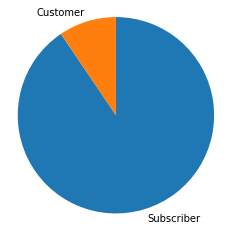

In [16]:
plt.pie(data, labels=data.index, startangle = 90, counterclock = False);
plt.axis('square');

#### Observation: In the dataset there are more counts of subscriber user type than customer user type

### Question: What is the relative frequency of different user types in data set (user_type)

In [17]:
# bar chart of relative frequency
df_copy.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [18]:
highest_count = df_copy.user_type.value_counts()[0]

In [19]:
count_sum = df_copy.user_type.value_counts().sum()

In [20]:
count_sum

174952

In [21]:
max_bar = highest_count / count_sum
max_bar

0.9053111710640633

In [22]:
#create ticks with numpy
ticks = np.arange(0, max_bar, 0.2)
tick_names = ['{:0.1f}'.format(i) for i in ticks]

tick_names

['0.0', '0.2', '0.4', '0.6', '0.8']

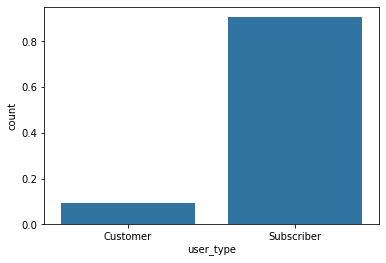

In [23]:
sb.countplot(data=df_copy, x="user_type", color=color)
plt.yticks(ticks * count_sum, tick_names);

#### Observation: The same as last visualization, but now we can clearly see the relative frequency of both user types

### Question: What is the frequency of birth years of the riders?

In [24]:
df_copy.member_birth_year.unique()

<IntegerArray>
[1984, 1972, 1989, 1974, 1959, 1983, 1988, 1992, 1996, 1993, 1990, 1981, 1975,
 1978, 1991, 1997, 1986, 2000, 1982, 1995, 1980, 1973, 1985, 1971, 1979, 1967,
 1998, 1994, 1977, 1999, 1987, 1969, 1963, 1976, 1964, 1965, 1961, 1968, 1966,
 1962, 1954, 1958, 1960, 1970, 1956, 1957, 1945, 1900, 1952, 1948, 1951, 1941,
 1950, 1949, 1953, 1955, 1946, 1947, 1931, 1943, 1942, 1920, 1933, 2001, 1878,
 1901, 1944, 1928, 1934, 1939, 1930, 1902, 1910, 1938, 1927]
Length: 75, dtype: Int64

In [25]:
order = df_copy.member_birth_year.value_counts()
type_order = order.index
type_order

Int64Index([1988, 1993, 1989, 1990, 1991, 1992, 1987, 1986, 1994, 1995, 1985,
            1984, 1983, 1980, 1982, 1996, 1981, 1979, 1997, 1998, 1978, 1977,
            1974, 1999, 1975, 1976, 1973, 1968, 1971, 1972, 2000, 1970, 1965,
            1969, 1967, 1964, 1963, 1966, 1962, 1961, 1957, 1960, 1959, 1958,
            1956, 1954, 1952, 1951, 1950, 1953, 1947, 1955, 1945, 1949, 1931,
            1900, 1948, 2001, 1943, 1942, 1933, 1946, 1939, 1902, 1941, 1901,
            1938, 1920, 1934, 1944, 1930, 1928, 1927, 1878, 1910],
           dtype='int64')

<AxesSubplot:xlabel='count', ylabel='member_birth_year'>

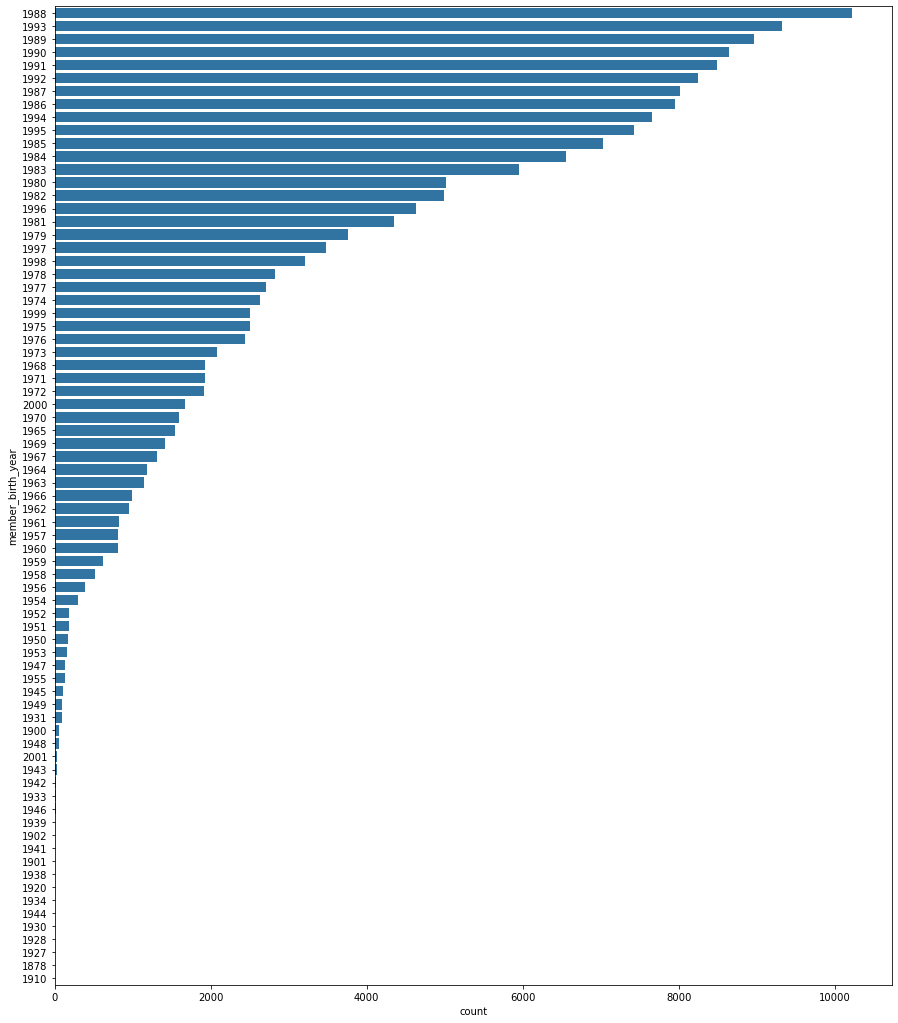

In [61]:
plt.figure(figsize=(15,18))
sb.countplot(data=df_copy, y="member_birth_year", color=color, order=type_order)


#### Observation: From the visualization above we can see that the year 1988 is the most frequent birth year of riders and the years of 1939 to 1910 on the scale have negligible riders.

### Question: What is the frequency of gender that take the rides?

In [27]:
# find out unique genders
df_copy.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [28]:
gender_order = df_copy.member_gender.value_counts().index
gender_order

Index(['Male', 'Female', 'Other'], dtype='object')

Text(0, 0.5, 'Frequency')

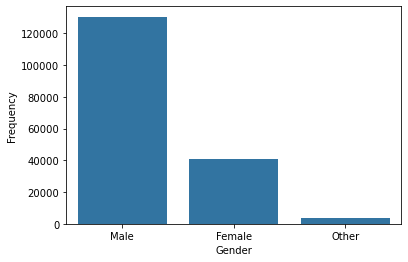

In [29]:
sb.countplot(data=df_copy, x="member_gender", color=color, order=gender_order)
plt.xlabel("Gender")
plt.ylabel("Frequency")

#### Observation: The male gender has the most frequency, followed by the female and other.

### What is the distribution of time accross the dataset?

In [30]:
new_df = df_copy.copy()
new_df["duration_hour"] = new_df["duration_sec"] / (60 * 60)


Text(0, 0.5, 'frequency')

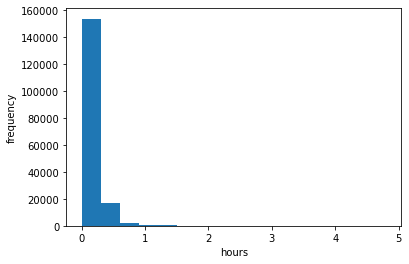

In [31]:
# histogram of time in hours
bina = np.arange(0, 5, 0.3)
plt.hist(data=new_df, x="duration_hour", bins=bina);
plt.xlabel("hours")
plt.ylabel("frequency")

#### Observation:  As seen from the visualization above,  rides normally take less than an hour to complete

### Question: What percentage of riders share bikes for trips?

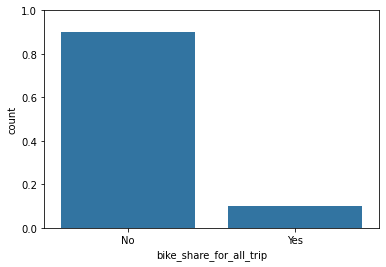

In [32]:
# A plot relative frequency will be used for this
def plot_relative_frequency_of_share_bike_column():
    share_max_count = df_copy.bike_share_for_all_trip.value_counts()[0]
    share_sum = df_copy.bike_share_for_all_trip.value_counts().sum()
    share_max_bar = share_max_count / share_sum
    
    share_ticks = np.arange(0, share_max_bar + 0.2, 0.2)
    share_tick_names = ['{:0.1f}'.format(i) for i in share_ticks]
    
    sb.countplot(data=df_copy, x="bike_share_for_all_trip", color=color);
    plt.yticks(share_ticks * share_sum, share_tick_names);
    

plot_relative_frequency_of_share_bike_column()

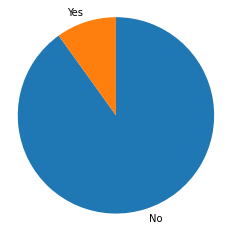

In [33]:
share_data = df_copy.bike_share_for_all_trip.value_counts()
plt.pie(share_data, labels=share_data.index, startangle = 90, counterclock = False);
plt.axis('square');

In [34]:
df_copy.bike_share_for_all_trip.value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

#### Observation: From the visualization above, more than 80 percent of riders do not share bikes



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discussion of the distribution(s) of variable(s) of interest.

> I made visualizations of quatitative and qualitative variables. The quantitative variable was the duration_sec, which I converted to hours to visualize it better with a histogram. The qualitative variables included: gender, user type, birth year and so on. The birth year was originally encoded as float. I had to tranform it to an integer before plotting my visualizations.

### Of the features investigated, the unusual distributions and transformations performed.

> As stated above I had to transform the birth year from a float encoding to an integer encoding. The visualization for the duration_sec was very concentrated at a particular regions and the x-axis had a large spread, so I tranformed the seconds to hours to make it clearer.

## Bivariate Exploration

> In this section, investigation of relationships between pairs of variables in the dataset.

### Question: What is the relationship between user_type and gender?

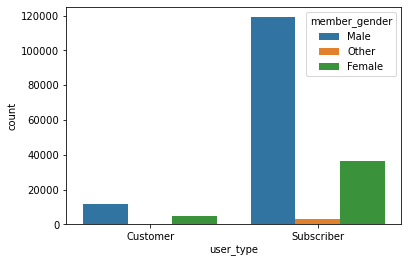

In [35]:
# A clustered bar chart will be created to visualize the relationship
sb.countplot(data = df_copy, x = 'user_type', hue = 'member_gender');

#### Observation: From the visualization above, its shown that for the customer user_type there are more males and negligible other. For the subcriber type, there is an enormous amount of males with females behind them.

### Question: Does the gender type have an effect on ride duration?

<AxesSubplot:xlabel='member_gender', ylabel='duration_sec'>

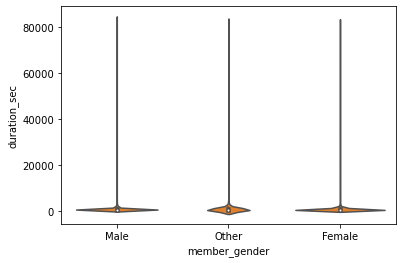

In [36]:
# Violinplot to visualize the data
sb.violinplot(data=df_copy, x="member_gender", y="duration_sec", color=sb.color_palette()[1])

Text(0, 0.5, 'hours')

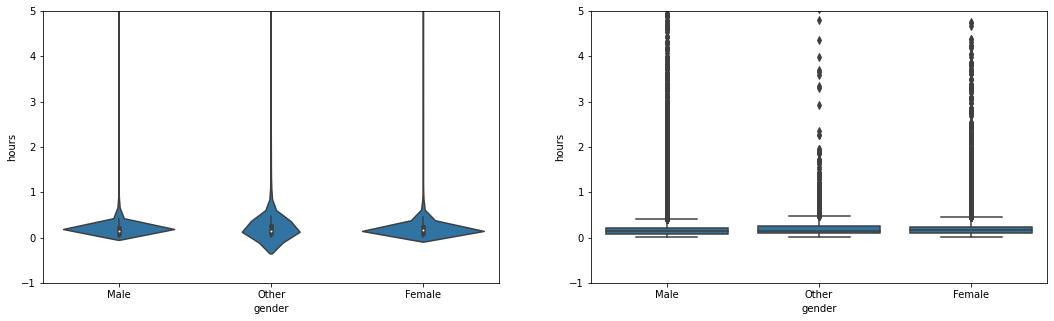

In [37]:
# Plotting the hour instead of seconds with a y-axis limit to see the bulk of data
plt.figure(figsize=[18,5])

plt.subplot(1, 2, 1)

sb.violinplot(data=new_df, x="member_gender", y="duration_hour", color=color)
plt.ylim(-1, 5)
plt.xlabel("gender")
plt.ylabel("hours")


plt.subplot(1, 2, 2)

sb.boxplot(data=new_df, x="member_gender", y="duration_hour", color=color)
plt.ylim(-1, 5)
plt.xlabel("gender")
plt.ylabel("hours")


#### Observation: As observed from the visualization above there really isn't a lot of difference between the genders when it regards ride time.

### Question: Does the type of gender have an effect on the frequency of bike share

<AxesSubplot:xlabel='member_gender', ylabel='count'>

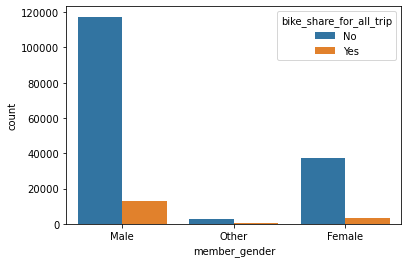

In [38]:
# A clustered bar chart will be made for this
sb.countplot(data=df_copy, x="member_gender", hue="bike_share_for_all_trip")

#### Observation: The visualization shows that the male gender do not share more, but that can be skewed due to the disproportionate size of both male and female sample sizes.

### Question: Does bike sharing have an effect on duration of ride?

Text(0, 0.5, 'hours')

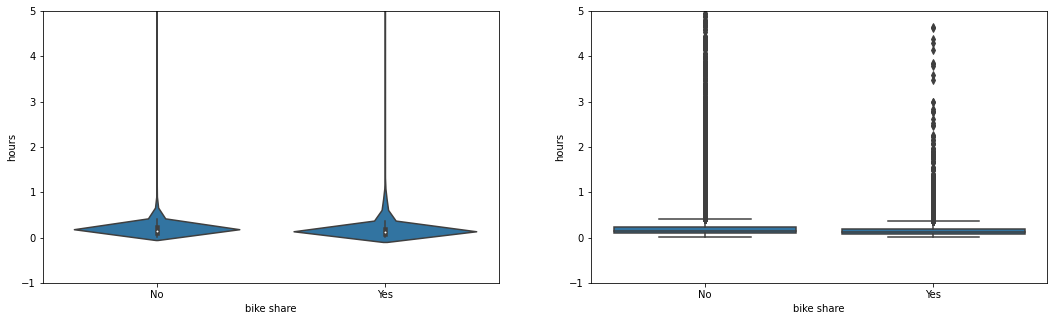

In [39]:
plt.figure(figsize=[18,5])

plt.subplot(1, 2, 1)

sb.violinplot(data=new_df, x="bike_share_for_all_trip", y="duration_hour", color=color)
plt.ylim(-1, 5)
plt.xlabel("bike share")
plt.ylabel("hours")


plt.subplot(1, 2, 2)

sb.boxplot(data=new_df, x="bike_share_for_all_trip", y="duration_hour", color=color)
plt.ylim(-1, 5)
plt.xlabel("bike share")
plt.ylabel("hours")

#### Observation: There's no real difference as regards duration between bikes that are shared and not shared.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationships expounded on during my analysis seemed to have that much disparity minus the gender and user_type plot.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There wasn't a lot of other features that caught my attention but I think it was interesting to see that there was no big disparity in duration between bike shared and bikes not shared. 

## Multivariate Exploration

> Investigation of three or more variabls.

### Question: What effect does the gender type have on duration and what type of customer is each gender

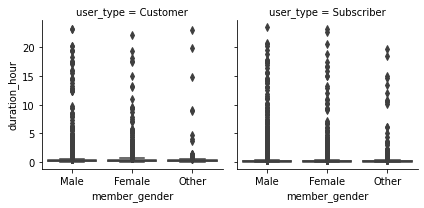

In [60]:
g = sb.FacetGrid(data = new_df, col = 'user_type', height=3)
g.map(sb.boxplot, 'member_gender', 'duration_hour', order=["Male", "Female", "Other"])

#### Observation: As seen from the plot above no apparent disparity detected.

### Relationships observed

> The features in this part of the analysis were inconclusive


## Conclusions
> Plots derived in this analysis were of differing types, spanning from univariate plots to bivariate, to multivariate plots.
The main features stemmed from the univariate and bivariate analysis. In the univariate analysis the standout features were the user_type frequency, frequency of the gender with most rides taken. For the bi-variate analysis, the relationship between user_type and gender.
